# **Reinforcement Learning**
<img align="right" src="https://vitalflux.com/wp-content/uploads/2020/12/Reinforcement-learning-real-world-example.png">

- In reinforcement learning, your system learns how to interact intuitively with the environment by basically doing stuff and watching what happens.

if you need the last version of gym use block of code below:

```sh
!pip uninstall gym -y
!pip install gym
```
<br>

And here is gymnasium version:

```python
gymnasium.__version__
```
1.2.0

In [ ]:
# !pip install -U gym==0.25.2
!pip install swig
!pip install gymnasium[atari]
!pip install gymnasium[box2d]
!pip install gymnasium[accept-rom-license]
# !pip install autorom[accept-rom-license]

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from IPython.core.display import HTML
from base64 import b64encode
from gym.wrappers import record_video, record_episode_statistics
from gym.wrappers import RecordVideo, RecordEpisodeStatistics
import torch
import os
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
def display_video(episode=0, video_width=600):
    """
    Displays a video from a specified episode with customizable width.

    Args:
        episode (int): The episode number to load the video for. Defaults to 0.
        video_width (int): The width of the video player in pixels. Defaults to 600.

    Returns:
        IPython.display.HTML: An HTML video element that can be rendered in Jupyter notebooks.

    Note:
        - The function expects video files to be in './video/' directory with naming format 'rl-video-episode-{N}.mp4'
        - Videos are base64 encoded and embedded directly in the HTML for display
    """
    # Construct the path to the video file based on episode number
    video_path = f"./video/rl-video-episode-{episode}.mp4"

    # Read the video file as binary data
    video_file = open(video_path, "rb").read()

    # Encode the binary video data as base64 string
    decoded = b64encode(video_file).decode()

    # Create a data URL for the video
    video_url = f"data:video/mp4;base64,{decoded}"

    # Return an HTML video element with the embedded video
    return HTML(f"""<video width="{video_width}"" controls><source src="{video_url}"></video>""")

def create_env(name, render_mode="rgb_array", record=False, eps_record=50, video_folder='./video'):
    """
    Creates and configures a Gym environment with optional video recording and statistics tracking.

    Args:
        name (str): Name of the Gym environment to create (e.g., 'CartPole-v1')
        render_mode (str): Rendering mode - "human", "rgb_array", or "ansi". Defaults to "rgb_array"
        record (bool): Whether to record videos of the environment. Defaults to False
        eps_record (int): Record a video every N episodes (when record=True). Defaults to 50
        video_folder (str): Directory to save recorded videos. Defaults to './video'

    Returns:
        gym.Env: Configured Gym environment wrapped with recording and statistics tracking

    Note:
        - When record=True, videos will be saved in the specified folder with automatic naming
        - The environment is always wrapped with episode statistics tracking
    """
    # Create base Gym environment with specified render mode
    env = gym.make(name, render_mode=render_mode)

    # Optionally wrap environment with video recorder
    if record:
        # Record video every eps_record episodes (trigger function)
        env = RecordVideo(env, video_folder=video_folder,
                         episode_trigger=lambda x: x % eps_record == 0)

    # Always wrap environment with episode statistics tracker
    env = RecordEpisodeStatistics(env)

    return env

def show_reward(total_rewards):
    """
    Plots the progression of rewards across episodes using matplotlib.

    Args:
        total_rewards (list or array-like): A sequence of reward values obtained per episode.

    Displays:
        A line plot showing the reward trend over episodes with:
        - X-axis: Episode number
        - Y-axis: Reward value

    Note:
        - This function immediately displays the plot using plt.show()
        - The plot uses default matplotlib styling
        - Useful for visualizing training progress in reinforcement learning
    """
    # Create line plot of reward values
    plt.plot(total_rewards)

    # Label the x-axis as 'Episode'
    plt.xlabel('Episode')

    # Label the y-axis as 'Reward'
    plt.ylabel('Reward')

    # Display the plot
    plt.show()

## **Dynamic programming**
In the [previous notebook](https://colab.research.google.com/github/Mhddaraaa/start/blob/main/ReinforcementLearning/4_RL_MarkoveDecisionProcess.ipynb) we have just developed an MDP and computed the value function of the optimal policy using matrix inversion.

**Dynamic programming** is an optimization technique that was developed by Richard Bellman in 1950s.

**policy evaluation** is a iterative algorithm. It starts with arbitrary policy values and then iteratively update the values base on **Bellman expectation equation** until they converge. In each iteration value of a policy $\pi$, for state $S$ is updated as follow:

<br>

The Bellman expectation equations:
---

---
<br>

- **For $V_\pi(s)$:**

$$
    V_\pi(s) = \sum_{a} \pi(a|s) \Biggl( \sum_{s{'}} P(s{'}| s, a) \left[ R(s, a, s{'}) + \gamma V_\pi(s{'}) \right] \Biggr)
$$

> **Outer Sum** (over $a$): This sums over all possible actions $a$ in state $s$, weighted by the policy probability $\pi(a|s)$.<br>
**Inner Sum** (over $s^\prime$): For each action $a$, this sums over all possible next states $s^\prime$, weighted by the transition probability $P(s{'}| s, a)$.

Expectation form:

$$
V_\pi(s) = \mathbb{E}_{a \sim \pi(\cdot|s), s' \sim P(\cdot|s,a)} \left[ R(s, a, s') + \gamma V_\pi(s') \right]
$$

> $a \sim \pi(\cdot|s)$: The action $a$ is sampled from the policy $\pi$ given state $s$.<br>
$s' \sim P(\cdot|s,a)$: The next state $s′$ is sampled from the transition dynamics $P$ given state $s$ and action $a$.<br>
$R(s, a, s') + \gamma V_\pi(s')$: The immediate reward plus the discounted value of the next state.

<br>

- **For $Q_{\pi}(s, a)$**

$$
\begin{split}
    Q_\pi(s, a) & = \sum_{s{'}} P(s{'}| s, a) \left[ R(s, a, s{'}) + \gamma \sum_{a{'}} \pi(a{'} | s{'}) Q_\pi(s{'}, a{'}) \right] \\
    \text{as we know: } v_{\pi}(s) & = \sum_{a} \pi(a| s) Q_\pi(s, a) \text{ So: }\\
    Q_\pi(s, a) & = \sum_{s{'}} P(s{'}| s, a) \left[ R(s, a, s{'}) + \gamma v_{\pi}(s^{'}) \right] \\
\end{split}
$$

Expectation form:

$$
Q_\pi(s, a) = \mathbb{E}_{s' \sim P(\cdot|s,a), \, a' \sim \pi(\cdot|s')} \left[ R(s, a, s') + \gamma Q_\pi(s', a') \right]
$$

<br>

The Bellman Optimality equations:
---

---
<br>

- **For $V(s)$:**

$$
V_*(s) = \max_a \sum_{s{'}} P(s{'} | s, a) \left[ R(s, a, s{'}) + \gamma V^(s{'}) \right]
$$


- **For $Q_{\pi}(s, a)$**

$$
Q_*(s, a) = \sum_{s{'}} P(s{'} | s, a) \left[ R(s, a, s{'}) + \gamma \max_{a{'}} Q_*(s{'}, a{'}) \right]
$$

---
<br>

1. **Policy evaluation or prediction**: first we use *expectation* equations to evaluate a policy
2. **policy improvement**: then we use *optimality* equations to find an optimal policy that maximizes the state values and state-action values.



> **Note**: In order to use this method the problem should have finite states and actions.

## **Performing Policy evalulation**

$$
\begin{split}
    \large (1) \hspace{5mm} V_{n+1}(s) & \leftarrow \sum_{a} \pi(a|s) \sum_{s{'}} P(s{'}| s, a) \left[ R(s, a, s{'}) + \gamma V_n(s{'}) \right] \\
    \text{Or} \\
    \large (2) \hspace{5mm} V_{n+1}(s) & \leftarrow \sum_{a}{\pi(s, a)\left[R(s,a) +
    \gamma\sum_{s^{'}}{T(s,a,s^{'})V_n(s{'})}\right]}
\end{split}
$$


>Since we want to iterate over and over again, $V(s)$ subscript changed from $\pi$ to $n$ and $n+1$. We initialize the value function $V$ to zeros for all states at the beginning.

If $n \rightarrow \infty$ then $V_n(s)$ will converge to $V_{\pi}(s)$

> **Note**: Here is the implementation of the second one.

> This is just for illustration purposes, the full implementation of policy evaluation will be later

In [ ]:
def policy_evaluation(policy, trans_matrix, rewards, gamma, threshold):
    """
    Evaluates the value function for a given policy using the Bellman expectation equation.

    Parameters:
        policy (torch.Tensor): A matrix of shape (n_state, n_action), where each entry represents the probability
                               of taking an action in a given state under the policy.
        trans_matrix (torch.Tensor): A matrix of shape (n_state, n_action, n_state), representing the transition
                                     probabilities. Entry trans_matrix[s, a, s'] is the probability of transitioning
                                     from state s to state s' by taking action a.
        rewards (torch.Tensor): A vector of shape (n_state,) containing the immediate rewards for each state.
        gamma (float): The discount factor, which determines the importance of future rewards (0 <= gamma < 1).
        threshold (float): A small positive number to determine the stopping condition for convergence.

    Returns:
        V (torch.Tensor): The estimated state-value function for the given policy.
        v_history (list): A list containing the history of state-value functions over iterations.
    """
    # Number of states
    n_state = policy.shape[0]

    # Initialize the value function V to zeros for all states
    V = torch.zeros(n_state)

    # Keep track of the history of V for analysis
    v_history = [V]

    # Start the policy evaluation loop
    while True:
        # Temporary value function to compute updated values
        v_temp = torch.zeros(n_state)

        # Iterate over each state
        for state, actions in enumerate(policy):
            # Iterate over each action in the given state
            for action, action_prob in enumerate(actions):
                # Compute the expected value of transitioning to all possible next states
                sigma = torch.dot(trans_matrix[state, action], V)  # Sum T(s, a, s') * V(s')
                # Update the temporary value function with the expected reward and discounted value
                # V(s) = Σ_a 𝜋(𝑠,𝑎)[𝑅(𝑠,𝑎) + γ * ∑_𝑠′𝑇(𝑠,𝑎,𝑠′)𝑉(𝑠′)]
                v_temp[state] += action_prob * (rewards[state] + gamma * sigma)

        # Compute the maximum change (delta) between the old and updated value functions
        delta = torch.max(torch.abs(V - v_temp))

        # Update the value function with the newly computed values
        V = v_temp.clone()

        # Append the current value function to the history for analysis
        v_history.append(V)

        # Check if the change (delta) is below the convergence threshold
        if delta <= threshold:
            break

    # Return the final value function and the history of updates
    return V, v_history

In [5]:
# Define the transition probability matrix (T)
T = torch.tensor(
    [[[0.8, 0.1, 0.1],  # From state 0, action 0 leads to state 0 with 80% probability, state 1 with 10%, state 2 with 10%.
      [0.1, 0.6, 0.3]],  # From state 0, action 1 leads to state 0 with 10%, state 1 with 60%, state 2 with 30%.
     [[0.7, 0.2, 0.1],  # From state 1, action 0 leads to state 0 with 70%, state 1 with 20%, state 2 with 10%.
      [0.1, 0.8, 0.1]],  # From state 1, action 1 leads to state 0 with 10%, state 1 with 80%, state 2 with 10%.
     [[0.6, 0.2, 0.2],  # From state 2, action 0 leads to state 0 with 60%, state 1 with 20%, state 2 with 20%.
      [0.1, 0.4, 0.5]]]  # From state 2, action 1 leads to state 0 with 10%, state 1 with 40%, state 2 with 50%.
)

R = torch.tensor([1., 0., -1.])  # State 0 gives a reward of 1, state 1 gives 0, and state 2 gives -1.

gamma = 0.5  # Future rewards are discounted by a factor of 0.5.

policy_optimal = torch.tensor(
    [[1., 0.],  # In state 0, the policy always chooses action 0 (probability 1.0 for action 0, 0.0 for action 1).
     [1., 0.],  # In state 1, the policy always chooses action 0.
     [1., 0.]]  # In state 2, the policy always chooses action 0.
)

threshhold = 0.0001  # Stop iterating when the maximum change in value estimates is below this threshold.

# Perform policy evaluation to compute the value function under the optimal policy
V, _ = policy_evaluation(policy_optimal, T, R, gamma, threshhold)

print(f"The value function under the optimal policy is: \n{V.numpy()}")

The value function under the optimal policy is: 
[ 1.6785905   0.6259589  -0.48207426]


In [6]:
policy_optimal = torch.tensor(
    [[.5, .5],
     [.5, .5],
     [.5, .5]]
)

V, v_history = policy_evaluation(policy_optimal, T, R, gamma, threshhold)
print(f"the value function under the optimal policy is: \n{V.numpy()}")

the value function under the optimal policy is: 
[ 1.2347662   0.26914817 -0.90129805]


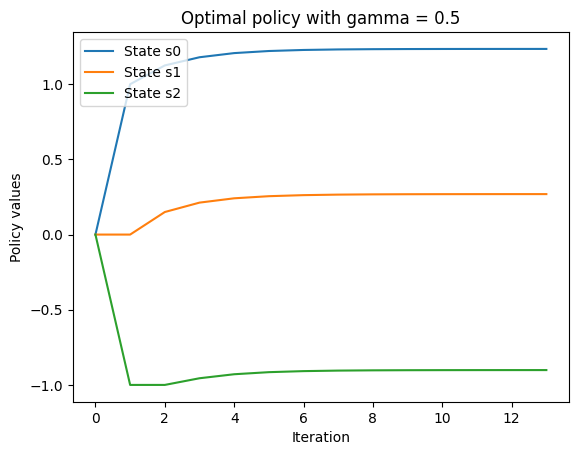

In [7]:
# Plot the value function for each state over iterations
s0, = plt.plot([v[0] for v in v_history])  # Extract and plot the value of state s0 over all iterations
s1, = plt.plot([v[1] for v in v_history])  # Extract and plot the value of state s1 over all iterations
s2, = plt.plot([v[2] for v in v_history])  # Extract and plot the value of state s2 over all iterations

plt.title(f"Optimal policy with gamma = {gamma}")
plt.xlabel("Iteration")
plt.ylabel("Policy values")
plt.legend([s0, s1, s2], ["State s0", "State s1", "State s2"], loc="upper left")
plt.show()

## **Value iteration algorithm**

An MDP is considered solved if it's optinal policy is found. we will figure out the optimal policy for the Frozen Lake environment using **value iteration**

The behind this algorithm is quite similar to that of policy evaluation, It is also an iterative algorithm. It starts with arbitrary policy value and the iteratively updates the values base on **Bellman optimality equation**. So in each iteration instead of taking the expectation(average) of values across all actions, it pick the action that achieve the maximal policy values:

<br>

---

$$
\large\textit{Bellman optimality equations:}\\
$$

$$
\begin{split}
    V_{*}(s) & = \underset{a}{max} \left[R(s,a) + \gamma\sum_{s^{'}}{T(s,a,s^{'})V_{*}(s^{'})}\right] \\
    \text{or} \\
    \\
    V_{*}(s) & = \underset{a}{max} \sum_{s^{'}}{T(s,a,s^{'})} \left[R(s,a, s^{'}) + \gamma V_{*}(s^{'})\right]
\end{split}
$$

---

<br>

Once the optimal values are computed, we can easily obtain the obtimal policy acccordingly:

$$
\pi_{*}(s) := \underset{a}{argmax} \sum_{s^{'}}{T(s,a,s^{'})}
\left[R(s,a, s^{'}) + \gamma V_{*}(s^{'})\right]
$$

<br>

- **Gym Environment**

```python
env.env.P[s][a] --> Transition_matrix_Prob, next_state, reward, info
# If the environment is wrapped with TimeLimit (which FrozenLake often is by default)
# To access the P attribute, unwrap the environment:
unwrapped_env = env.unwrapped
unwrapped_env.P[s][a] --> Transition_matrix_Prob, next_state, reward, info
```
we going to use above function for value iteration algorithm

## **Key Difference Between Policy Evaluation and Value Iteration**

1. **Policy Evaluation:**
- **Goal**: Compute the value function $V_\pi(s)$ for a fixed policy $\pi$, which specifies the probability of taking each action in every state.
- **Update Rule**:

$$
    V_\pi(s) = \sum_{a} \pi(a|s) \sum_{s{'}} P(s{'}|s, a) \left[ R(s, a, s{'}) + \gamma V_\pi(s{'}) \right]
$$
> *Input*: A fixed policy $\pi$. <br> *Output*: The value function $V_\pi(s)$ for that policy.

<br>

2. **Value Iteration:**
- **Goal**: Find the optimal value function $V(s)$ and derive the optimal policy $\pi$.

- **Update Rule**:  It iteratively computes the optimal value function by taking the maximum over all possible actions.

$$
V_*(s) = \max_a \sum_{s{'}} P(s{'}|s, a) \left[ R(s, a, s{'}) + \gamma V(s{'}) \right]
$$

> *Input*: The environment’s dynamics (transition probabilities and rewards). <br> *Output*: The optimal value function $V_*(s)$.


Function |  What It Does | When to Use It
---------|---------------|---------------
value_iteration | Directly computes the optimal value function $V_*$ | When you want to skip policy iteration and go straight to optimal values
policy_evaluation | Evaluates how good a specific policy $\pi$ is (computes $V_π$)| Used within policy iteration, between policy improvement steps

In [14]:
def value_iteration(env, gamma, threshold):
    """
    Performs value iteration to compute the optimal value function.

    Parameters:
        env: The environment object (assumed to follow OpenAI Gym's structure).
        gamma: The discount factor (0 <= gamma < 1).
        threshold: The convergence threshold for stopping the algorithm.

    Returns:
        V: The optimal value function for the environment.
    """
    n_state = env.observation_space.n # Number of states in the environment
    n_action = env.action_space.n # Number of actions in the environment

    # Initialize the value function to zero for all states
    V = torch.zeros(n_state)
    # If the environment is wrapped with TimeLimit (which FrozenLake often is by default)
    # To access the P attribute, unwrap the environment:
    unwrapped_env = env.unwrapped

    # Start the value iteration loop
    while True:
        # Temporary value function to store updated values
        v_temp = torch.empty(n_state)

        # Iterate over each state in the environment
        for state in range(n_state):
            # Compute the value for each action in the current state
            v_action = torch.zeros(n_action)
            for action in range(n_action):
                # Iterate over all possible transitions for the (state, action) pair
                for T_prob, s_prime, R, _ in unwrapped_env.P[state][action]:
                    # Add the contribution of each transition to the action value
                    v_action[action] += T_prob * (R + gamma * V[s_prime].item())

            # Take the maximum action value as the new value for the current state
            v_temp[state] = torch.max(v_action)

        # Compute the maximum change in value across all states (convergence check)
        delta = torch.max(torch.abs(V - v_temp))

        # Update the value function
        V = v_temp.clone()

        # Stop iterating if the maximum change is below the threshold
        if delta <= threshold:
            break

    # Return the optimal value function
    return V

## **Policy imporovement**

In the previous sections (value iteration and policy evaluation), after starting with a random policy, we getting $V(s)$ for a given policy. Instead of followinga random policy $\pi(a|s)$, now we look at the value of taking $|A|$ number of actions individually. These are the action value ($q(s,a )$) of each action we can take in our environment:

$$
    \large q(s, a) = \sum_{s^{'}, a}p(s^{'},r|s, a) \left[ r + \gamma v_{\pi}(s^{'}) \right]
$$

If any of the $q(s, a)$ is greater than the current state value $v_π(s)$, it means that current policy $π(a| s)$ is not taking the optimal action. So Taking the q-value with max action (**Greedy step**) vlaue and defining this to be the policy in state $S$ will give a higher state value compared to the current policy $π(a| s)$:

$$
    \large \pi^{'}(a|s) = \underset{a}{\textit{argmax}} \ q(s, a)
$$

In [15]:
def policy_improvment(env, optimal_value, gamma):
    """
    Performs policy improvement based on a given optimal value function.

    Parameters:
        env: The environment object (assumed to follow OpenAI Gym's structure).
        optimal_value (torch.Tensor): The optimal value function computed previously.
        gamma (float): The discount factor (0 <= gamma < 1).

    Returns:
        policy (torch.Tensor): The improved policy, where each entry represents the optimal action for a given state.
    """
    n_state = env.observation_space.n # Number of states in the environment
    n_action = env.action_space.n # Number of actions in the environment

    # If the environment is wrapped with TimeLimit (which FrozenLake often is by default)
    # To access the P attribute, unwrap the environment:
    unwrapped_env = env.unwrapped

    # Initialize the policy as a tensor of zeros (one action per state)
    policy = torch.zeros(n_state)

    # Iterate over each state in the environment
    for state in range(n_state):
        # Initialize a tensor to store the value of each action in the current state
        v_action = torch.zeros(n_action)

        # Iterate over all possible actions for the current state
        for action in range(n_action):
            # Iterate over all possible transitions for the (state, action) pair
            for T_prob, s_prime, R, _ in unwrapped_env.P[state][action]:
                # Compute the action value using the Bellman optimality equation:
                # Q(s, a) = Σ_s' P(s'|s, a) * [R(s, a, s') + γ * V(s')]
                v_action[action] += T_prob * (R + gamma * optimal_value[s_prime].item())

        # Choose the action with the highest value (greedy policy)
        policy[state] = torch.argmax(v_action)

    # Return the improved policy
    return policy

In [17]:
def run_episode(env, policy):
    """
    Executes a single episode in the environment using a given policy.

    Args:
        env (gym.Env): The environment to run the episode in.
        policy (dict or array): A mapping from states to actions (or action probabilities).
                              If policy[state] is a tensor, .item() is used to extract the scalar value.

    Returns:
        float: The total reward accumulated during the episode.

    Operation:
        1. Resets the environment to start a new episode.
        2. Interacts with the environment until the episode terminates.
        3. Follows the policy's action selection at each state.
        4. Accumulates rewards received during the episode.
    """
    # Initialize the environment and get the starting state
    state, _ = env.reset()

    # Initialize total reward counter
    total_reward = 0

    # Initialize termination flag
    done = False

    # Run the episode until termination
    while not done:
        # Select action according to the policy for the current state
        # .item() converts a tensor to a Python scalar if needed
        action = policy[state].item()

        # Execute the action in the environment
        # Returns: next_state, reward, done_flag, additional_info
        state, reward, done, _ = env.step(action)

        # Accumulate the reward
        total_reward += reward

    # Return the total reward obtained in this episode
    return total_reward

In [ ]:
# import os
# os.environ["SDL_VIDEODRIVER"] = "dummy"

## **Frozen Lake Environment**
<center><img align="right" width="200" src="https://www.gymlibrary.dev/_images/frozen_lake.gif">

<br>

|                   |            |
|-------------------|--------------|
| action Space      | Discrete(4) |
| Observation Space | Discrete(16) |
| Import            | `gym.make("FrozenLake-v1")` |


In [33]:
env = create_env("FrozenLake-v1")
gamma = 0.99
threshhold = 0.0001
v_optimal = value_iteration(env, gamma, threshhold)
optimal_policy = policy_improvment(env, v_optimal, gamma).long()

In [30]:
env = create_env("FrozenLake-v1", record = True, eps_record=50)
n_episode = 500
total_rewards = []

pbar = tqdm(range(n_episode), desc="Episode")
for episode in pbar:
    R = run_episode(env, optimal_policy)
    total_rewards.append(R)

    # Compute and print the average total reward over past 50 completed episodes
    start = episode - 50 if episode > 50 else 0
    avg_tot_reward = np.array(total_rewards[start:]).mean()
    pbar.set_description(f"Average reward over past 50 episodes: {avg_tot_reward:.2f}")


Episode:   0%|          | 0/500 [00:00<?, ?it/s]

In [20]:
display_video(450)

## **Policy iteration algorithm**
this algorithm can be divided into two components:
1. policy evaluation
2. policy improvment

It starts with an arbitrary policy, And each iteration, It first computes the policy values given the latest policy, Based on the $\normalsize\textit{Bellman expectation equation}$; It then extract an improved policy out the resulting policy values, Based on the $\normalsize\textit{Bellman optimality equation}$. It iteratively evaluates the policy and generates an improved version until the policy doesn't change any more.

<br>

$$
\large \textit{Bellman expectation equation:}\\
V(s) = \sum_{a}{\pi(s, a)\left[R(s,a) +
\gamma\sum_{s^{'}}{T(s,a,s^{'})V(s^{'})}\right]}
$$

<br>

$$
\large\textit{Bellman optimality equation}\\
\pi_{*}(s) := argmax_{a}\sum_{s^{'}}{T(s,a,s^{'})}
\left[R(s,a, s^{'}) + \gamma V_{*}(s^{'})\right]
$$

<br>
<br>

now we implement Policy evaluation and Policy imporovement multiple time:

<br>

$$
    \large \pi_0 \xrightarrow{evaluation} v_{\pi_0} \xrightarrow{improve} \pi_1 \xrightarrow{evaluation} v_{\pi_1} \xrightarrow{improve} \pi_2 ...  \pi_* \xrightarrow{evaluation} v_{*}
$$

In [25]:
def policy_evaluation(env, policy, gamma, threshold):
    """
    Evaluates a policy by estimating its state-value function V^π using iterative policy evaluation.

    Args:
        env (gym.Env): The environment with known dynamics (env.P)
        policy (torch.Tensor): Current policy mapping states to actions
        gamma (float): Discount factor (0 ≤ γ ≤ 1)
        threshold (float): Convergence threshold for value function estimation

    Returns:
        torch.Tensor: Estimated state-value function V^π for the given policy

    Process:
        1. Initializes value function V(s) arbitrarily (zeros)
        2. Iteratively updates V(s) using Bellman expectation equation:
           V(s) = Σ P(s'|s,π(s)) * [R + γV(s')]
        3. Stops when maximum value change between iterations < threshold
    """
    n_state = env.observation_space.n
    V = torch.zeros(n_state)  # Initialize value function

    # If the environment is wrapped with TimeLimit (which FrozenLake often is by default)
    # To access the P attribute, unwrap the environment:
    unwrapped_env = env.unwrapped

    while True:
        v_temp = torch.zeros(n_state)  # Temporary storage for new values

        # Update each state's value
        for state in range(n_state):
            action = policy[state].item()  # Action prescribed by policy

            # Sum over possible transitions (s' = next state)
            for trans_prob, next_state, reward, _ in unwrapped_env.P[state][action]:
                v_temp[state] += trans_prob * (reward + gamma * V[next_state].item())

        # Check convergence
        delta = torch.max(torch.abs(V - v_temp))
        V = v_temp.clone()
        if delta <= threshold:
            break

    return V

In [26]:
def policy_improvment(env, optimal_value, gamma):
    """
    Performs policy improvement based on a given optimal value function.

    Parameters:
        env: The environment object (assumed to follow OpenAI Gym's structure).
        optimal_value (torch.Tensor): The optimal value function computed previously.
        gamma (float): The discount factor (0 <= gamma < 1).

    Returns:
        policy (torch.Tensor): The improved policy, where each entry represents the optimal action for a given state.
    """
    n_state = env.observation_space.n # Number of states in the environment
    n_action = env.action_space.n # Number of actions in the environment

    # If the environment is wrapped with TimeLimit (which FrozenLake often is by default)
    # To access the P attribute, unwrap the environment:
    unwrapped_env = env.unwrapped

    # Initialize the policy as a tensor of zeros (one action per state)
    policy = torch.zeros(n_state)

    # Iterate over each state in the environment
    for state in range(n_state):
        # Initialize a tensor to store the value of each action in the current state
        v_action = torch.zeros(n_action)

        # Iterate over all possible actions for the current state
        for action in range(n_action):
            # Iterate over all possible transitions for the (state, action) pair
            for T_prob, s_prime, R, _ in unwrapped_env.P[state][action]:
                # Compute the action value using the Bellman optimality equation:
                # Q(s, a) = Σ_s' P(s'|s, a) * [R(s, a, s') + γ * V(s')]
                v_action[action] += T_prob * (R + gamma * optimal_value[s_prime].item())

        # Choose the action with the highest value (greedy policy)
        policy[state] = torch.argmax(v_action)

    # Return the improved policy
    return policy

In [27]:
def policy_iteration(env, gamma, threshhold):
    """
    Performs policy iteration to compute the optimal policy and value function.

    Parameters:
        env: The environment object (assumed to follow OpenAI Gym's structure).
        gamma (float): The discount factor (0 <= gamma < 1).
        threshhold (float): The convergence threshold for stopping the policy evaluation step.

    Returns:
        V (torch.Tensor): The optimal value function for the environment.
        improved_policy (torch.Tensor): The optimal policy derived through policy iteration.
    """
    n_state = env.observation_space.n # Number of states in the environment
    n_action = env.action_space.n # Number of actions in the environment

    # Initialize a random policy with shape (n_state,)
    # Each state is assigned a random action initially
    policy = torch.randint(high=n_action, size=(n_state,)).float()

    # Start the policy iteration loop
    while True:
        # Evaluate the current policy to compute the value function
        V = policy_evaluation(env, policy, gamma, threshhold)

        # Improve the policy based on the computed value function
        improved_policy = policy_improvment(env, V, gamma)

        # Check if the policy has converged (no changes in policy)
        if torch.equal(improved_policy, policy):
            # Return the optimal value function and policy
            return V, improved_policy

        # Update the policy for the next iteration
        policy = improved_policy

**Algorithm** | **Bellman Equation** | **Type of Problem**
-------------|----------------------|--------------------
Iterative policy evaluation | expectation equations | prediction
Policy iteration | expectation equations and greedy improvement | Control
Value iteraion | optimality equationn | Control

In [28]:
env = create_env("FrozenLake-v1")
gamma = 0.99
threshhold = 0.0001
v_optimal, policy_improved = policy_iteration(env, gamma, threshhold)

print(f"Optimal value: \n{v_optimal}\n")
print(f"optimal policy: \n{policy_improved}\n")

Optimal value: 
tensor([0.5404, 0.4966, 0.4681, 0.4541, 0.5569, 0.0000, 0.3572, 0.0000, 0.5905,
        0.6421, 0.6144, 0.0000, 0.0000, 0.7410, 0.8625, 0.0000])

optimal policy: 
tensor([0., 3., 3., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])



In [31]:
n_episode = 500
total_rewards = []
pbar = tqdm(range(n_episode))
for episode in pbar:
    R = run_episode(env, policy_improved.long())
    total_rewards.append(R)

    # Compute and print the average total reward over past 50 completed episodes
    start = episode - 50 if episode > 50 else 0
    avg_tot_reward = np.array(total_rewards[start:]).mean()
    pbar.set_description(f"Average reward over past 50 episodes: {avg_tot_reward:.2f}")

  0%|          | 0/500 [00:00<?, ?it/s]

In [32]:
display_video(450)